Hackathon Korea 2022 Metal Project B 4Q design - ydkim

In [1]:
%load_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr
import numpy as np

In [2]:
from qiskit_metal.qlibrary.terminations.launchpad_wb_driven import LaunchpadWirebondDriven
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.framed_path import RouteFramed
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.qubits.transmon_pocket_6 import TransmonPocket6
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
from collections import OrderedDict
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.user_components.Round_Transmon import RoundTransmon
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
design = designs.DesignPlanar({}, True)
design.chips.main.size.size_x = '6mm'
design.chips.main.size.size_y = '6mm'
design.chips.main.size.size_z = '-0.5mm'
design.chips.main.material = 'Silicon'
gui = MetalGUI(design)

In [4]:
opt_Q_a = dict(pad_width = '500um',
             pad_height = '80um',
             pad_gap = '20um',
             pocket_width = '650um',
             pocket_height = '450um',
             inductor_width = '2um',
             qubit_fillet = '30um',
             pocket_fillet = '50um',
             connection_pads = dict(bus_R=dict(loc_W=+1, loc_H=+1, pocket_rise='0um', pad_gap='15um', pad_width='78um', pad_height='30um', pad_cpw_shift='10um'),
                                    bus_L=dict(loc_W=-1, loc_H=+1, pocket_rise='0um', pad_gap='15um', pad_width='85um', pad_height='30um', pad_cpw_shift='10um'),
                                    RO=dict(loc_W=0, loc_H=-1, pocket_rise='0um', pad_gap='33um', pad_width='100um', pad_height='20um', pad_cpw_shift='0um', cpw_extend='0um')))

opt_Q_b = dict(pad_width = '500um',
             pad_height = '80um',
             pad_gap = '20um',
             pocket_width = '650um',
             pocket_height = '450um',
             inductor_width = '2um',
             qubit_fillet = '30um',
             pocket_fillet = '50um',
             connection_pads = dict(bus_R=dict(loc_W=+1, loc_H=+1, pocket_rise='0um', pad_gap='15um', pad_width='85um', pad_height='30um', pad_cpw_shift='10um'),
                                    bus_L=dict(loc_W=-1, loc_H=+1, pocket_rise='0um', pad_gap='15um', pad_width='77um', pad_height='30um', pad_cpw_shift='10um'),
                                    RO=dict(loc_W=0, loc_H=-1, pocket_rise='0um', pad_gap='40um', pad_width='97um', pad_height='20um', pad_cpw_shift='0um', cpw_extend='0um')))



Q01 = RoundTransmon(design, 'Q01', options=dict(pos_x=-1.2, pos_y=1, orientation='180',**opt_Q_a))
Q02 = RoundTransmon(design, 'Q02', options=dict(pos_x=1.2, pos_y=1, orientation='180',**opt_Q_b))    
Q03 = RoundTransmon(design, 'Q03', options=dict(pos_x=1.2, pos_y=-1, orientation='0',**opt_Q_a))
Q04 = RoundTransmon(design, 'Q04', options=dict(pos_x=-1.2, pos_y=-1, orientation='0',**opt_Q_b))


gui.rebuild()
gui.autoscale()

In [5]:
t01 = CoupledLineTee(design, 't01', options = dict(pos_x = -1.2, pos_y = 2.5, orientation = '0', coupling_length = '200um', fillet = '75um'))
t02 = CoupledLineTee(design, 't02', options = dict(pos_x = 1.2, pos_y = 2.5, orientation = '0', coupling_length = '200um', fillet = '75um'))
t03 = CoupledLineTee(design, 't03', options = dict(pos_x = 1.2, pos_y = -2.5, orientation = '180', coupling_length = '200um', fillet = '75um'))
t04 = CoupledLineTee(design, 't04', options = dict(pos_x = -1.2, pos_y = -2.5, orientation = '180', coupling_length = '200um', fillet = '75um'))

gui.rebuild()
gui.autoscale()

In [6]:
opt_res_a = dict(
    meander = dict(spacing = '150um', asymmetry = '0um'),
    lead = dict(start_straight = '80um'),
    total_length = '7.5mm',
    fillet = '74.99um')

opt_res_b = dict(
    meander = dict(spacing = '150um', asymmetry = '0um'),
    lead = dict(start_straight = '80um'),
    total_length = '7.4mm',
    fillet = '74.99um')


res01 = RouteMeander(design, 'res01', options = dict(pin_inputs = dict(start_pin = dict(component = 't01', pin = 'second_end'),
                                                                       end_pin = dict(component = 'Q01', pin = 'RO')),
                                                                       **opt_res_a))
res02 = RouteMeander(design, 'res02', options = dict(pin_inputs = dict(start_pin = dict(component = 't02', pin = 'second_end'),
                                                                       end_pin = dict(component = 'Q02', pin = 'RO')),
                                                                       **opt_res_b))
res03 = RouteMeander(design, 'res03', options = dict(pin_inputs = dict(start_pin = dict(component = 't03', pin = 'second_end'),
                                                                       end_pin = dict(component = 'Q03', pin = 'RO')),
                                                                       **opt_res_a))
res04 = RouteMeander(design, 'res04', options = dict(pin_inputs = dict(start_pin = dict(component = 't04', pin = 'second_end'),
                                                                       end_pin = dict(component = 'Q04', pin = 'RO')),
                                                                       **opt_res_b))


gui.rebuild()
gui.autoscale()

In [7]:
opt_c_a = dict(meander = dict(spacing = '150um'),
               lead = dict(start_straight = '250um', end_straight = '80um'),
               fillet = '74.99um',
               total_length = '6.5mm')

opt_c_b = dict(meander = dict(spacing = '150um'),
               lead = dict(start_straight = '250um', end_straight = '80um'),
               fillet = '74.99um',
               total_length = '6mm')



c12 = RouteMeander(design, 'c12', options = dict(pin_inputs = dict(start_pin = dict(component = 'Q01', pin = 'bus_L'),
                                                                       end_pin = dict(component = 'Q02', pin = 'bus_R')),
                                                                       **opt_c_b))


c23 = RouteMeander(design, 'c23', options = dict(pin_inputs = dict(start_pin = dict(component = 'Q02', pin = 'bus_L'),
                                                                       end_pin = dict(component = 'Q03', pin = 'bus_R')),
                                                                       **opt_c_a))

c34 = RouteMeander(design, 'c34', options = dict(pin_inputs = dict(start_pin = dict(component = 'Q03', pin = 'bus_L'),
                                                                       end_pin = dict(component = 'Q04', pin = 'bus_R')),
                                                                       **opt_c_b))


c41 = RouteMeander(design, 'c41', options = dict(pin_inputs = dict(start_pin = dict(component = 'Q04', pin = 'bus_L'),
                                                                       end_pin = dict(component = 'Q01', pin = 'bus_R')),
                                                                       **opt_c_a))



gui.rebuild()
gui.autoscale()

In [8]:
ro_in_1 = LaunchpadWirebondDriven(design, 'ro_in_1', options = dict(pos_x = '-2.7mm', pos_y = '2.5mm', orientation = '0'))
ro_in_2 = LaunchpadWirebondDriven(design, 'ro_in_2', options = dict(pos_x = '-2.7mm', pos_y = '-2.5mm', orientation = '0'))
ro_out_1 = LaunchpadWirebondDriven(design, 'ro_out_1', options = dict(pos_x = '2.7mm', pos_y = '2.5mm', orientation = '180'))
ro_out_2 = LaunchpadWirebondDriven(design, 'ro_out_2', options = dict(pos_x = '2.7mm', pos_y = '-2.5mm', orientation = '180'))

gui.rebuild()
gui.autoscale()

In [9]:
fl1 = RouteStraight(design, 'fl1', options = dict(pin_inputs = dict(start_pin = dict(component = 'ro_in_1', pin = 'tie'),
                                                                       end_pin = dict(component = 't01', pin = 'prime_start'))))

fl2 = RouteStraight(design, 'fl2', options = dict(pin_inputs = dict(start_pin = dict(component = 't01', pin = 'prime_end'),
                                                                       end_pin = dict(component = 't02', pin = 'prime_start'))))

fl3 = RouteStraight(design, 'fl3', options = dict(pin_inputs = dict(start_pin = dict(component = 't02', pin = 'prime_end'),
                                                                       end_pin = dict(component = 'ro_out_1', pin = 'tie'))))

fl4 = RouteStraight(design, 'fl4', options = dict(pin_inputs = dict(start_pin = dict(component = 'ro_in_2', pin = 'tie'),
                                                                       end_pin = dict(component = 't04', pin = 'prime_end'))))

fl5 = RouteStraight(design, 'fl5', options = dict(pin_inputs = dict(start_pin = dict(component = 't04', pin = 'prime_start'),
                                                                       end_pin = dict(component = 't03', pin = 'prime_end'))))

fl6 = RouteStraight(design, 'fl6', options = dict(pin_inputs = dict(start_pin = dict(component = 't03', pin = 'prime_start'),
                                                                       end_pin = dict(component = 'ro_out_2', pin = 'tie'))))

gui.rebuild()
gui.autoscale()

In [10]:
otg1 = OpenToGround(design, 'otg1', options = dict(pos_x = '-1.6mm', pos_y = '1.05mm', orientation = '0'))
otg2 = OpenToGround(design, 'otg2', options = dict(pos_x = '1.6mm', pos_y = '1.05mm', orientation = '180'))
otg3 = OpenToGround(design, 'otg3', options = dict(pos_x = '1.6mm', pos_y = '-1.05mm', orientation = '180'))
otg4 = OpenToGround(design, 'otg4', options = dict(pos_x = '-1.6mm', pos_y = '-1.05mm', orientation = '0'))

gui.rebuild()
gui.autoscale()

In [11]:
drive_1 = LaunchpadWirebondDriven(design, 'drive_1', options = dict(pos_x = '-2.7mm', pos_y = '1.05mm', orientation = '0'))
drive_2 = LaunchpadWirebondDriven(design, 'drive_2', options = dict(pos_x = '2.7mm', pos_y = '1.05mm', orientation = '180'))
drive_3 = LaunchpadWirebondDriven(design, 'drive_3', options = dict(pos_x = '2.7mm', pos_y = '-1.05mm', orientation = '180'))
drive_4 = LaunchpadWirebondDriven(design, 'drive_4', options = dict(pos_x = '-2.7mm', pos_y = '-1.05mm', orientation = '0'))

gui.rebuild()
gui.autoscale()

In [12]:
dl1 = RouteStraight(design, 'dl1', options = dict(pin_inputs = dict(start_pin = dict(component = 'drive_1', pin = 'tie'),
                                                                       end_pin = dict(component = 'otg1', pin = 'open'))))

dl2 = RouteStraight(design, 'dl2', options = dict(pin_inputs = dict(start_pin = dict(component = 'drive_2', pin = 'tie'),
                                                                       end_pin = dict(component = 'otg2', pin = 'open'))))

dl3 = RouteStraight(design, 'dl3', options = dict(pin_inputs = dict(start_pin = dict(component = 'drive_3', pin = 'tie'),
                                                                       end_pin = dict(component = 'otg3', pin = 'open'))))

dl4 = RouteStraight(design, 'dl4', options = dict(pin_inputs = dict(start_pin = dict(component = 'drive_4', pin = 'tie'),
                                                                       end_pin = dict(component = 'otg4', pin = 'open'))))


gui.rebuild()
gui.autoscale()

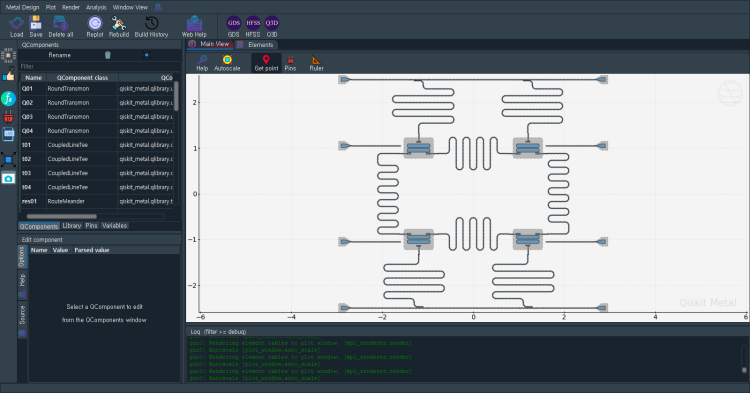

In [13]:
gui.screenshot()

In [15]:
from qiskit_metal.analyses.simulation.scattering_impedance import ScatteringImpedanceSim
em1 = ScatteringImpedanceSim(design, "hfss")
hfss = em1.renderer
hfss.start()

INFO 03:02PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:02PM [load_ansys_project]: 	Opened Ansys App
INFO 03:02PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 03:02PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/ddute/Documents/Ansoft/
	Project:   hackathon
INFO 03:02PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 03:02PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:02PM [connect]: 	Connected to project "hackathon" and design "Design_q3d" 😀 



True

In [16]:
hfss.activate_ansys_design("design_1", 'drivenmodal')


03:02PM 48s WARNING [activate_ansys_design]: The design_name=design_1 was not in active project.  Designs in active project are: 
['Design_q3d'].  A new design will be added to the project.  
INFO 03:02PM [connect_design]: 	Opened active design
	Design:    design_1 [Solution type: DrivenModal]
WARNING 03:02PM [connect_setup]: 	No design setup detected.
WARNING 03:02PM [connect_setup]: 	Creating drivenmodal default setup.
INFO 03:02PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssDMSetup'>)


In [17]:
hfss.render_design(selection=[],
                   open_pins=[],
                   port_list=[],
                   jj_to_port=[],
                   ignored_jjs=[],
                   box_plus_buffer=True)


com_error:  (-2147352567, '예외가 발생했습니다.', (0, None, None, None, 0, -2147024381), None)


com_error: (-2147352567, '예외가 발생했습니다.', (0, None, None, None, 0, -2147024381), None)

In [ ]:
em1.close()
